In [128]:
import backtester as bt
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [129]:
ticker = []
ticker.append("AAPL")
ticker.append("TSLA")
ticker.append("MSFT")
ticker.append("GOOG")

In [130]:
start = datetime.datetime(2021, 9, 16)
end = datetime.datetime(2022, 9, 18)
data = yf.download(tickers = ticker, start=start, end=end, interval = "1d")
data = data['Adj Close']
size = len(ticker)

[*********************100%***********************]  4 of 4 completed


In [131]:
print(data)

                  AAPL        GOOG        MSFT        TSLA
Date                                                      
2021-09-16  147.960876  144.373505  302.684967  252.330002
2021-09-17  145.246094  141.463501  297.379425  253.163330
2021-09-20  142.143478  139.016998  291.855682  243.389999
2021-09-21  142.630753  139.646500  292.351562  246.460007
2021-09-22  145.037262  140.938507  296.100128  250.646667
...                ...         ...         ...         ...
2022-09-12  163.429993  111.870003  266.649994  304.420013
2022-09-13  153.839996  105.309998  251.990005  292.130005
2022-09-14  155.309998  105.870003  252.220001  302.609985
2022-09-15  152.369995  103.900002  245.380005  303.750000
2022-09-16  150.699997  103.629997  244.740005  303.350006

[253 rows x 4 columns]


In [133]:
def min_variance(data):

    #Convert data into daily returns, average daily returns and annual returns
    size = data.shape[1]
    data_returns = data.pct_change()
    data_returns = data_returns[1:]
    daily_average = np.mean(data_returns,axis = 0)
    annual_average = ((daily_average+1)**365)-1
    #Construct Covariance matrix
    cov_data = np.cov(data_returns.T)
    #Construct other vectors
    bottom = np.ones(size)
    bottom2 = np.ones(size+1)
    bottom2[-1] = 0
    beta = np.zeros(size+1)
    beta[-1] = 1
    #Concatenate all Vectors with Covariance Matrix
    test = np.c_[2*cov_data,bottom.T]
    final = np.row_stack((test, bottom2))
    answer = np.matmul(np.linalg.inv(final),beta)

    #Compute NP Arrays that contain:
    #Portfolio Weights
    weights = np.around(answer,3)
    p_weights = weights[0:-1]
    weights1 = np.array(p_weights, dtype=float)
    #Portfolio Mean
    p_mean = np.dot(weights1,annual_average)
    #Portfolio Variance
    p_variance = np.matmul(np.matmul(weights1.T,cov_data),weights1)
    return p_weights, p_mean, p_variance


In [136]:
p_weights, p_mean, p_variance = min_variance(data)
print(p_weights)
print(p_mean)
print(p_variance)

[ 0.557  0.106  0.473 -0.136]
-0.17939301646859962
0.0003307489628520761


In [137]:
def min_variance_mean(data, target_mean):
    #Set Target Mean
    mean = target_mean
    size = data.shape[1]
    #Convert data into daily returns, average daily returns and annual returns
    data_returns = data.pct_change()
    data_returns = np.array(data_returns[1:])
    daily_average = np.mean(data_returns,axis = 0)
    annual_average = ((daily_average+1)**365)-1
    #Construct Covariance matrix
    cov_data = np.cov(data_returns.T)
    #Construct other vectors
    bottom = np.ones(size)
    bottom2 = np.ones(size+2)
    bottom2[-2] = 0
    bottom2[-1] = 0
    beta = np.zeros(size+2)
    beta[-2] = mean
    beta[-1] = 1
    #Concatenate all Vectors with Covariance Matrix
    test = np.c_[2*cov_data,annual_average.T,bottom.T]
    annual_average = np.append(annual_average,np.array([0,0]))
    final = np.row_stack((test,annual_average, bottom2))
    #Compute weights
    answer = np.matmul(np.linalg.inv(final),beta)
    #Round weights
    weights = np.around(answer,3)
    p_weights = weights[0:-2]

    #Compute NP Arrays that contain:
    #Portfolio Weights
    weights1 = np.array(p_weights, dtype=float)
    #Portfolio Mean
    p_mean = np.dot(weights1,annual_average[0:size])
    #Portfolio Variance
    p_variance = np.matmul(np.matmul(weights1.T,cov_data),weights1)
    return p_mean, p_variance, p_weights

In [144]:
def efficient_frontier(data,max_mean):
    means = np.linspace(0.01,max_mean,100)
    mean_value = []
    variance_value = []
    for i in means:
        #Obtain portfolio mean and variance
        p_mean, p_variance, p_weights= min_variance_mean(data,i)
        #Store each value in list
        mean_value.append(p_mean)
        variance_value.append(p_variance)
    #Plot the Efficient Frontier
    plt.scatter(variance_value,mean_value)
    plt.xlabel('Portfolio Variance (%)')
    plt.ylabel('Portfolio Return (%)')
    plt.title("Efficient Frontier")
    plt.show()

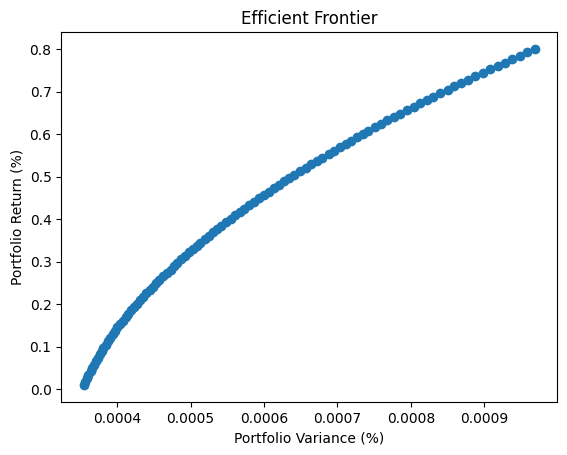

In [145]:
p_mean, p_variance, p_weights = min_variance_mean(data,0.20)
efficient_frontier(data,0.8)

In [257]:
import yahoo_fin.stock_info as si
import pandas as pd


In [311]:
#quote = si.tickers_nasdaq(False)
#icers = si.tickers_sp500(False)
temp = si.get_stats_valuation("aapl")
#pb = temp[temp.Attribute.str.contains("Price/Book")]
#print(pb)
a = pd.DataFrame(3)


#temp = np.array(temp)

ValueError: DataFrame constructor not properly called!

In [324]:
data = yf.Ticker("AAPL")
start = datetime.datetime(2021, 9, 16)
end = datetime.datetime(2021, 9, 17)
data.history(start=start, end=end)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-16 00:00:00-04:00,147.612851,148.139897,146.399648,147.960892,68034100,0,0


In [328]:

ticker = []
ticker.append("AAPL")
ticker.append("TSLA")
ticker.append("MSFT")
ticker.append("GOOG")
start = datetime.datetime(2021, 9, 16)
end = datetime.datetime(2021, 9, 17)

data = yf.download(tickers = ticker, start=start, end=end)
data = data['Adj Close']
print(data)

[*********************100%***********************]  4 of 4 completed
                  AAPL        GOOG        MSFT        TSLA
Date                                                      
2021-09-16  147.960892  144.373505  302.685028  252.330002


In [336]:
import bs4 as bs
import requests
import math
def Tickers():
  resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text, 'lxml')

  table = soup.find('table', {'class': 'wikitable sortable'})
  tickers = []

  for row in table.findAll('tr')[1:]:
      ticker = row.findAll('td')[0].text
      tickers.append(ticker)

  tickers = [s.replace('\n', '') for s in tickers]
  return tickers

In [2]:
tickers = ["AAPL", "TSLA", "MSFT" "GOOG"]

In [99]:
tickers = ["AAPL", "TSLA", "MSFT","GOOG"]


start = datetime.datetime(2021, 9, 16)
end = datetime.datetime(2021, 9, 17)
begining = yf.download(tickers, start=start, end=end)['Adj Close']

start = datetime.datetime(2022, 9, 15)
end = datetime.datetime(2022, 9, 16)

ending = yf.download(tickers, start=start, end=end)['Adj Close']

print(ending.shape)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
(1, 4)


In [146]:
start = np.array(begining)
end = np.array(ending)
means = (end - start)/start
means = means.reshape(4)
print(means)
avg_means = np.mean(means)
std_means = np.std(means)
standardized_means = (means-avg_means)/std_means
print(standardized_means)
#index = np.flip(np.argsort(means))
index = np.argsort(means)
for i in index:
    print(f"company: {tickers[i]}, return: {round(means[i]*100,2)}%")


weights = np.zeros(len(ticker))




[ 0.02979911 -0.28033886 -0.18932229  0.20378075]
[ 0.4698951  -1.17087547 -0.68935655  1.39033692]
company: TSLA, return: -28.03%
company: MSFT, return: -18.93%
company: AAPL, return: 2.98%
company: GOOG, return: 20.38%


In [123]:
weights = np.zeros(len(tickers))
ranking = index+1
total = sum(ranking)
print(ranking)
print(total)

for i in index:
    print(f"company: {tickers[i]}, weight: {(ranking[i]/total)*100}%")





[2 3 1 4]
10
company: TSLA, weight: 30.0%
company: MSFT, weight: 10.0%
company: AAPL, weight: 20.0%
company: GOOG, weight: 40.0%
